# **3. Visualización de gráficos**

# **I. Gestión de directorios y archivos en la nube**

La gestión de archivos y directorios en Google Drive es el proceso de organizar, proteger y compartir información digital en la nube, aprovechando sus funciones de colaboración en tiempo real, control de versiones, permisos de acceso y sincronización multiplataforma, lo que facilita el trabajo individual y grupal de manera eficiente.

## 1.1. Montar Google drive a Colaboratory




Montar Google Drive en Colab es el proceso mediante el cual el entorno de ejecución de Colab obtiene acceso autorizado a los archivos de Google Drive, de forma que se pueden leer, escribir y modificar archivos durante la sesión.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2. Explorar contenido de Google Drive

Explorar contenido de Google Drive se refiere a la acción de navegar, buscar, visualizar y gestionar los archivos y carpetas almacenados en Google Drive, la plataforma de almacenamiento en la nube de Google.



In [3]:
def listar_carpeta(ruta_carpeta):
  import os
  ruta_drive ="/content/drive/MyDrive/"
  contenido_carpeta = os.listdir(ruta_drive + ruta_carpeta)
  n_elem = len(contenido_carpeta)

  print(f"Ruta: {ruta_drive + ruta_carpeta}")
  print(f"Numero de elementos: {n_elem}")

  for i in range(n_elem):
    print(f"({i}) {contenido_carpeta[i]}")

La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos`**

In [4]:
listar_carpeta("Base_datos")

Ruta: /content/drive/MyDrive/Base_datos
Numero de elementos: 4
(0) fuente_de_datos.gdoc
(1) shapes
(2) biomedicina
(3) meteorologia


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/biomedicina`**

In [5]:
listar_carpeta("Base_datos/biomedicina")

Ruta: /content/drive/MyDrive/Base_datos/biomedicina
Numero de elementos: 12
(0) datos_abiertos_vigilancia_dengue_2000_2023.csv
(1) datos_abiertos_vigilancia_malaria_2000_2008.csv
(2) datos_abiertos_vigilancia_malaria_2009_2023.csv
(3) Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Diabetes_202001_202404.csv
(4) datos_abiertos_vigilancia_zoonosis_2000_2023.csv
(5) datos_abiertos_vigilancia_iras_2000_2023.csv
(6) datos_abiertos_vigilancia_enfermedad_carrion_2000_2023.csv
(7) pmGenoma_25Septiembre2021.csv
(8) pmGenoma_27Sep2023.csv
(9) TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv
(10) primeras_100_filas_anemia.xlsx
(11) primeras_100_filas_anemia.gsheet


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/meteorologia`**

In [6]:
listar_carpeta("Base_datos/meteorologia")

Ruta: /content/drive/MyDrive/Base_datos/meteorologia
Numero de elementos: 1
(0) data_estacion_madrid.xlsx


# **II. Importar base de datos**

## 2.1. Preparar entorno

In [7]:
# Paquete especializado en metodos numericos
import numpy as np

# Paquete especialozado manejo de estructuras de datos tipo tablas (Data Frames)
import pandas as pd

# Paquetes especializado para generar graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Paquete especializados de estadística y metodos numéricos
from scipy import stats

# Paquete especializado en estadística
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.2. Archivos en formato EXCEL



Las mediciones de temperatura del aire, humedad relativa y radiación solar (variables ambientales), realizadas por una estación meteorológica en un punto geográfico específico son datos **cuantitativos contínuos**.

In [8]:
excel_data_file = "/content/drive/MyDrive//Base_datos/meteorologia/data_estacion_madrid.xlsx"

In [9]:
# immportando el archivo Excel
df_excel = pd.read_excel(excel_data_file)
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


In [10]:
data_interes = df_excel[[ "rxn_solar", "hr", "temp_aire"]]
print(data_interes)

      rxn_solar         hr  temp_aire
0     99.833333  73.583333   3.625000
1     74.333333  60.625000   1.329167
2    101.500000  63.958333   1.920833
3    101.958333  57.791667   3.433333
4    106.666667  69.541667   0.445833
..          ...        ...        ...
329   87.833333  69.875000   5.562500
330   93.041667  61.500000   5.500000
331  117.750000  60.291667   4.783333
332  108.750000  61.541667  10.112500
333  102.958333  74.000000   6.691667

[334 rows x 3 columns]


## 2.3. Archivos en formato CSV

Importar archivos en formato CSV (Comma-Separated Values, o Valores Separados por Comas) consiste en el proceso de cargar o transferir datos almacenados en un archivo CSV a un programa, aplicación o base de datos para su procesamiento, análisis o almacenamiento. Un archivo CSV es un formato de texto plano que organiza datos en filas y columnas, donde los valores están separados por comas (u otros delimitadores, como punto y coma o tabulaciones) y cada fila representa un registro.

In [11]:
csv_data_file = "/content/drive/My Drive/Base_datos/biomedicina/TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv"

df_csv = pd.read_csv(csv_data_file)
print(df_csv)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

# **III. Visualización de datos cuantitativos**

La visualización de datos cuantitativos es el proceso de representar gráficamente información numérica para facilitar su comprensión y análisis. En Python, bibliotecas como Matplotlib y Seaborn son herramientas poderosas para crear una amplia variedad de gráficos que revelan patrones, tendencias, distribuciones y relaciones en los datos.

Python, con sus ricas bibliotecas de visualización, permite personalizar estos gráficos para comunicar eficazmente los hallazgos clave de un análisis de datos cuantitativos.

In [12]:
# Definir conjunto de datos
tiempo = df_excel["fecha"]
temp_prom = df_excel["temp_aire"]
hr = df_excel["hr"]
rxn = df_excel["rxn_solar"]

## 3.1. Gráficos de líneas

Ideales para mostrar la evolución de una o más variables a lo largo del tiempo o de otra secuencia ordenada. Permiten identificar tendencias, ciclos y fluctuaciones.

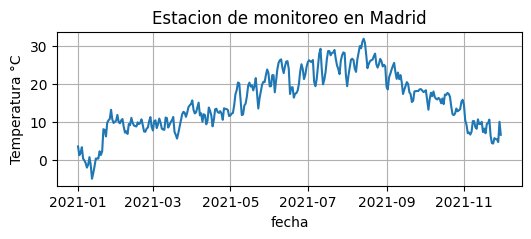

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 2))
axes.plot(tiempo, temp_prom)
axes.set_ylabel("Temperatura °C")
axes.set_xlabel("fecha")
axes.set_title("Estacion de monitoreo en Madrid")
axes.grid(True)
plt.show()

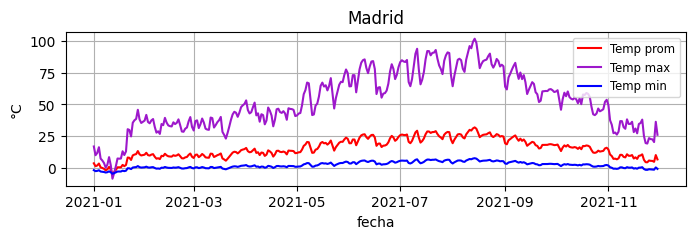

In [14]:
temp_min = temp_prom/3 - 3
temp_max = 3*temp_prom + 6

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
axes.plot(tiempo, temp_prom, label="Temp prom", color="r")
axes.plot(tiempo, temp_max, label="Temp max", color="#9d18cb")
axes.plot(tiempo, temp_min, label="Temp min", color="b")
axes.set_ylabel("Temperatura °C")
axes.set_xlabel("fecha")
axes.set_title("Estacion de monitoreo en Madrid")
axes.grid(True)
axes.legend()

axes.set_ylabel("°C")
axes.set_xlabel("fecha")
axes.set_title("Madrid")
axes.grid(True)

axes.legend( loc='upper right', fontsize='small') # loc: lower, upper:left, right, center
plt.show()

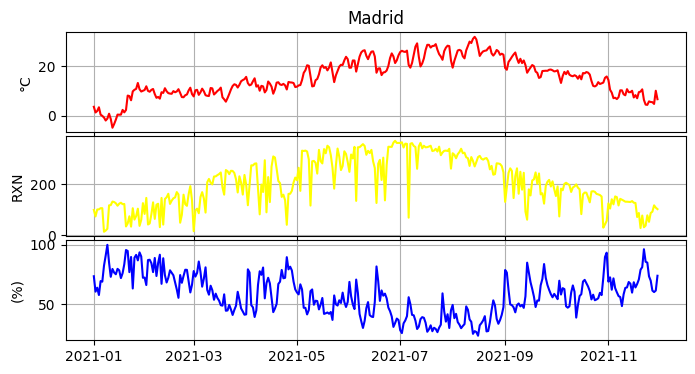

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1,sharex=True, figsize=(8, 4))

fig.subplots_adjust(hspace=0.04)
axes[0].plot(tiempo, temp_prom, color="red")
axes[0].set_ylabel("°C")
axes[0].set_title('Madrid')
axes[0].grid(True)

axes[1].plot(tiempo, rxn, color="yellow")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("RXN")
axes[1].grid(True)

axes[2].plot(tiempo, hr, color="blue")
axes[2].set_ylabel("(%)")
axes[2].grid(True)
plt.show()

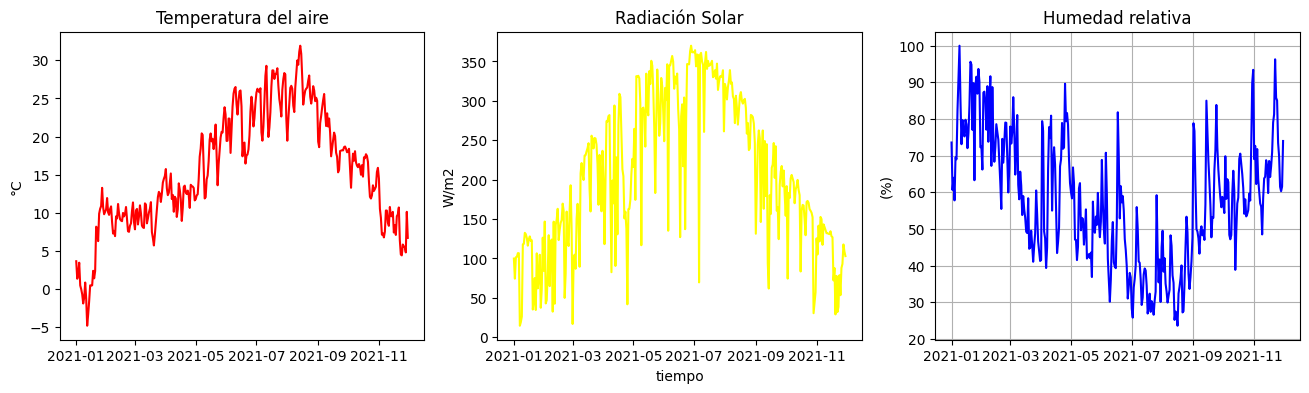

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharex=True, figsize=(16, 4))
fig.subplots_adjust(hspace=0.06)
axes[0].plot(tiempo, temp_prom, color="red")
axes[0].set_ylabel("°C")
axes[0].set_title('Temperatura del aire')


axes[1].plot(tiempo, rxn, color="yellow")
axes[1].set_title('Radiación Solar')
axes[1].set_xlabel("tiempo")
axes[1].set_ylabel("W/m2")

axes[2].plot(tiempo, hr, color="blue")
axes[2].set_title('Humedad relativa')
axes[2].set_ylabel("(%)")
axes[2].grid(True)
plt.show()

## 3.2. Gráfica de Barras

 Aunque a menudo se usan para datos categóricos, también pueden representar datos cuantitativos cuando se muestra una medida (como la suma, el promedio, etc.) para diferentes categorías o grupos.

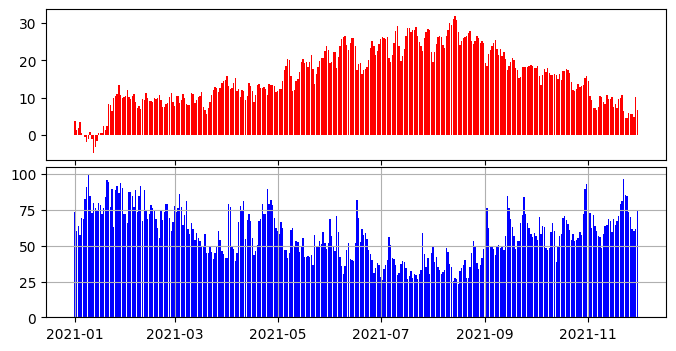

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 4))
fig.subplots_adjust(hspace=0.05)

axes[0].bar(tiempo, temp_prom, color="red")

axes[1].bar(tiempo, hr, color="blue")
axes[1].grid(True)

## 3.3. Diagrama de cajas

Proporcionan un resumen visual de la distribución de una variable cuantitativa, mostrando la mediana, los cuartiles y los posibles valores atípicos. Son útiles para comparar la distribución de una variable entre diferentes categorías.

In [18]:
# Extraer el mes de la fecha
df_excel['mes_numero'] = df_excel['fecha'].dt.strftime('%m')
#df_interpolado['mes_nombre'] = df_interpolado['fecha'].dt.month_name()
df_excel['mes_nombre'] = df_excel['fecha'].dt.strftime('%b')

In [19]:
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar mes_numero  \
0             0 2021-01-01   3.625000  73.583333   99.833333         01   
1             1 2021-01-02   1.329167  60.625000   74.333333         01   
2             2 2021-01-03   1.920833  63.958333  101.500000         01   
3             3 2021-01-04   3.433333  57.791667  101.958333         01   
4             4 2021-01-05   0.445833  69.541667  106.666667         01   
..          ...        ...        ...        ...         ...        ...   
329         329 2021-11-26   5.562500  69.875000   87.833333         11   
330         330 2021-11-27   5.500000  61.500000   93.041667         11   
331         331 2021-11-28   4.783333  60.291667  117.750000         11   
332         332 2021-11-29  10.112500  61.541667  108.750000         11   
333         333 2021-11-30   6.691667  74.000000  102.958333         11   

    mes_nombre  
0          Jan  
1          Jan  
2          Jan  
3          Jan  
4          Jan

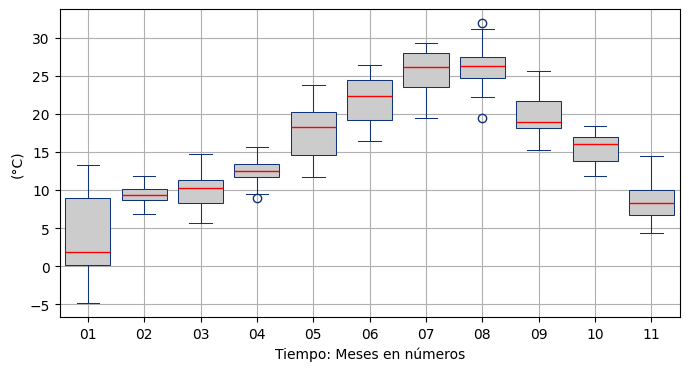

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.boxplot(x='mes_numero', y='temp_aire', data=df_excel,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},
            ax=axes,
            )
plt.xlabel("Tiempo: Meses en números")
plt.ylabel("(°C)")
plt.grid(True)

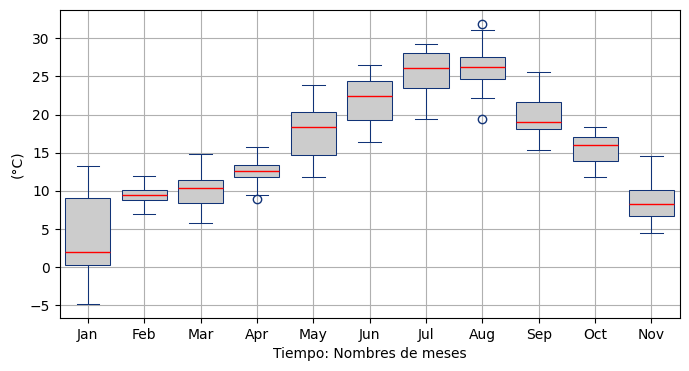

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.boxplot(x='mes_nombre', y='temp_aire', data=df_excel,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},
            ax=axes,
            )
plt.xlabel("Tiempo: Nombres de meses")
plt.ylabel("(°C)")
plt.grid(True)

Realizar graficas de diagrama de cajas usando las otras variables (humedad relativa y radiación solar)

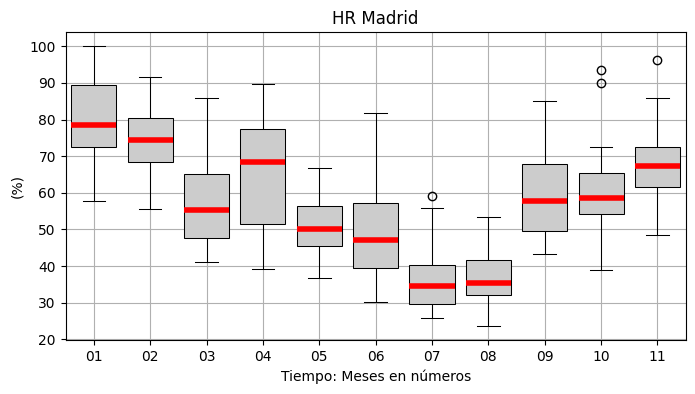

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.boxplot(x='mes_numero', y='hr', data=df_excel,
            fill=True, color=".8", linecolor="black",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 4},
            ax=axes,
            )
plt.xlabel("Tiempo: Meses en números")
plt.ylabel("(%)")
plt.title("HR Madrid")
plt.grid(True)

##  3.4. Gráficas de Dispersión

Muestran la relación entre dos variables cuantitativas. Cada punto en el gráfico representa una observación, con su posición determinada por los valores de las dos variables. Son útiles para identificar correlaciones y patrones de agrupación.

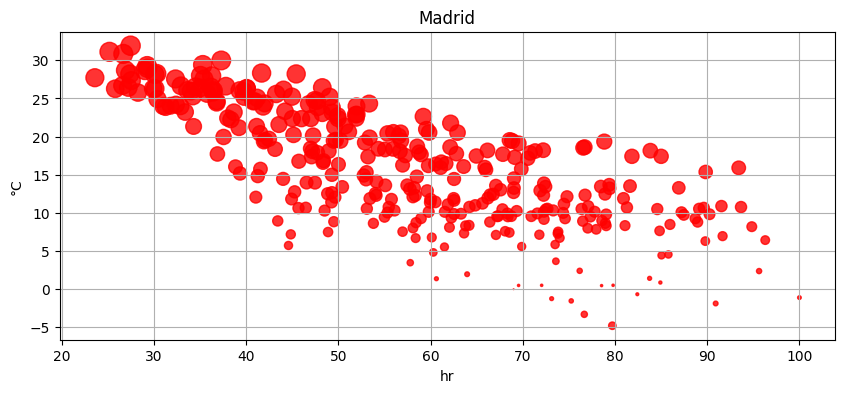

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))

scatter = ax.scatter(df_excel["hr"], df_excel["temp_aire"], s=np.abs(df_excel["temp_aire"])*6, c="r" ,alpha=0.8)
ax.set_xlabel("hr")
ax.set_ylabel("°C")
ax.set_title('Madrid')
ax.grid(True)

plt.show()

# **IV. Visualización de datos cualitativos**



La visualización de datos cualitativos se enfoca en representar información no numérica o categórica para comprender patrones, distribuciones y relaciones entre diferentes grupos o categorías. Aunque los datos cualitativos no tienen un valor numérico inherente, su visualización es crucial para comunicar ideas, comparar grupos y identificar tendencias en datos descriptivos. Python, a través de bibliotecas como Matplotlib y Seaborn, ofrece herramientas versátiles para este propósito.

**Tipos comunes de visualizaciones para datos cualitativos:**

*   **Gráficos de Barras:** Ideales para comparar la frecuencia o la proporción de diferentes categorías. Cada barra representa una categoría y su longitud indica la cantidad de observaciones en esa categoría.
<!--*   **Gráficos de Conteo (Count Plots):** Similar a los gráficos de barras, pero específicamente diseñados para mostrar el número de ocurrencias de cada categoría en una variable cualitativa.-->
*   **Gráficos de Pastel (Pie Charts):** Muestran la proporción de cada categoría en relación con el total. Son útiles para visualizar la composición de un conjunto de datos cualitativos.
*   **Diagramas de Caja (Box Plots):** Aunque se usan a menudo para datos cuantitativos, pueden ser útiles para visualizar la distribución de una variable cuantitativa dentro de diferentes categorías cualitativas.
<!--*   **Gráficos de Violín (Violin Plots):** Combinan la información de un diagrama de caja con una estimación de la densidad de probabilidad, mostrando la forma de la distribución de una variable cuantitativa para cada categoría cualitativa.
<!--*   **Mapas de Árbol (Treemaps):** Representan datos jerárquicos cualitativos utilizando rectángulos anidados, donde el tamaño de cada rectángulo corresponde a la proporción de la categoría.
<!--*   **Nubes de Palabras (Word Clouds):** Visualizan la frecuencia de palabras en un texto, donde el tamaño de cada palabra es proporcional a su aparición. Son útiles para identificar los términos más comunes en datos textuales.-->

Python permite personalizar estos gráficos con colores, etiquetas y otros elementos visuales para resaltar la información clave y facilitar la interpretación de los datos cualitativos.

In [24]:
nombre_columnas = df_csv.columns.to_list()
print(nombre_columnas)

['Sexo', 'id_persona', 'Edad', 'Tipo_edad', 'id_ubigeo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'Lab', 'id_eess']


In [36]:
frecuencia_sexo = df_csv["Sexo"].value_counts()
print(frecuencia_sexo)

Sexo
M    126255
F    122638
Name: count, dtype: int64


In [37]:
x = frecuencia_sexo.index
y = frecuencia_sexo.values

In [38]:
print(x)

Index(['M', 'F'], dtype='object', name='Sexo')


In [39]:
print(y)

[126255 122638]


## 4.1. Gráficas de barras

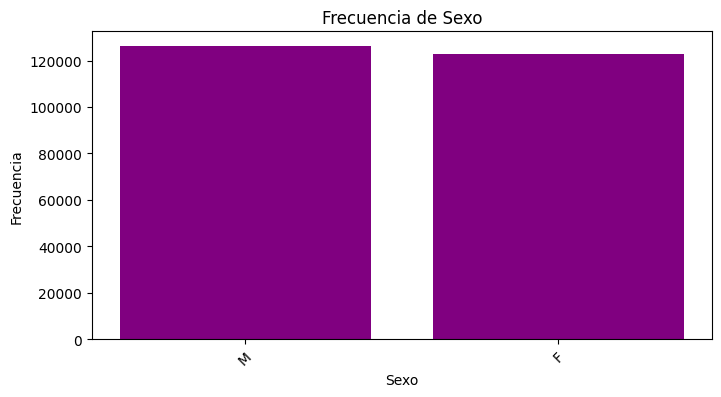

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
axes.bar(x, y, color="purple")
axes.tick_params(axis='x', rotation=45)

axes.set_ylabel("Frecuencia")
axes.set_xlabel("Sexo")
axes.set_title("Frecuencia de Sexo")
#axes.grid(True)
plt.show()

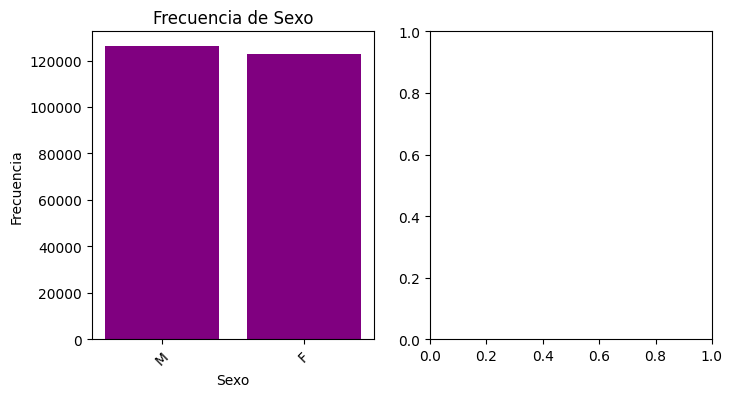

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].bar(x, y, color="purple")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel("Frecuencia")
axes[0].set_xlabel("Sexo")
axes[0].set_title("Frecuencia de Sexo")
#axes.grid(True)
plt.show()

##  4.2. Gráficos de Pastel

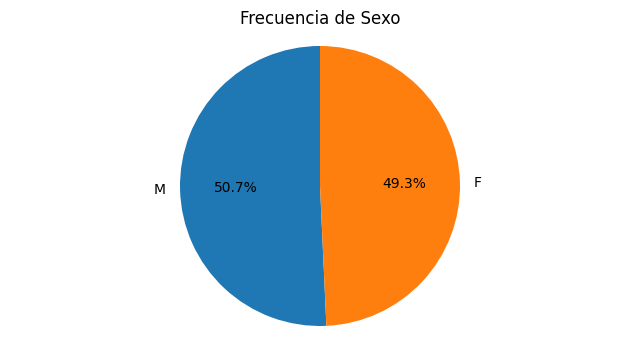

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

axes.pie(frecuencia_sexo, labels=x, autopct='%1.1f%%',  startangle=90)

axes.axis('equal')

axes.set_title("Frecuencia de Sexo")
plt.show()

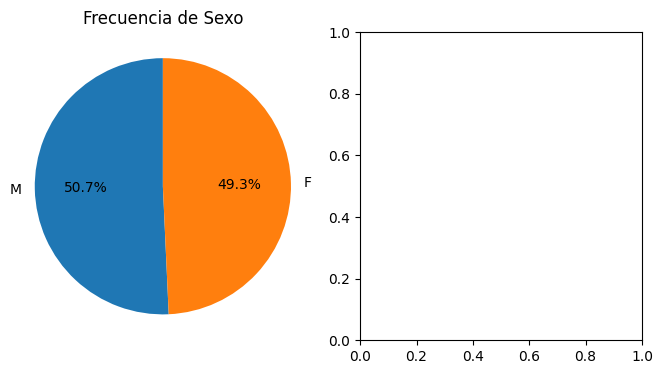

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].pie(frecuencia_sexo, labels=x, autopct='%1.1f%%',  startangle=90)

axes[0].axis('equal')
axes[0].set_title("Frecuencia de Sexo")


plt.show()

## 4.3. Diagramas de Caja (Box Plots)

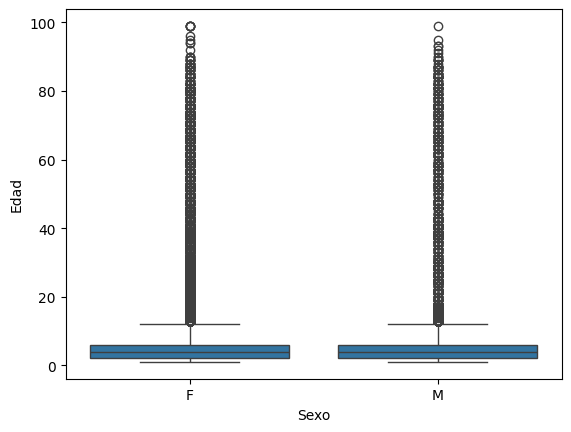

In [51]:
sns.boxplot(x="Sexo", y="Edad", data=df_csv)
plt.show()

#**IV. Referencias**

**Libros y manuales**

- Libro de estadisitica con python

  https://www.editorial-sciela.org/index.php/sciela/article/view/16/49

- Introducción a la teoria de probabilidades

  https://ciladi.org/wp-content/uploads/Version_final_Introduccion-Probabilidad-Python-vf_Bayas-3.pdf

- Guía practica de análsis exploratorio de python

  https://datos.gob.es/sites/default/files/doc/file/guia_eda_python.pdf


**Cursos en linea**

- Estadística W3School:

  https://www.w3schools.com/statistics/index.php

- Estadística con python:

  https://docs.python.org/es/3/library/statistics.html

- Kaggle:

  https://www.kaggle.com/code/saurav9786/statistics-for-data-scientists

**Aplicaciones IA**

- Gemini iA

  https://gemini.google.com

- DeepSeek

  https://www.deepseek.com/

- Chat GPT

  https://chatgpt.com/

- Claude IA

  https://claude.ai/

- Julius IA:

  https://julius.ai

